In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [28]:
yelp_path = '../works/data/reviews_yelp_nn.csv'
cols = ['review_id', 'funny', 'stars', 'text', 'date']

def date_parser(serie):
    return serie.astype(datetime64)

In [29]:
df = pd.read_csv(yelp_path,
                 sep='\t',
                 usecols=cols,
                 date_parser= date_parser,
                 parse_dates=['date'])

AttributeError: 'str' object has no attribute 'astype'

In [24]:
df.head()

,funny,review_id,stars,text
0,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i..."
1,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...
2,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...
3,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...
4,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl..."


In [6]:
# Definimos countvectorizer para distintos ngrams
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b') 
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')

In [7]:
sample = df.sample(n=100000, random_state=1)

In [8]:
# Aplicamos Fit al transformador
bow_converter.fit(sample['text'].values.astype('U'))
words = bow_converter.get_feature_names()

In [9]:
bigram_converter.fit(sample['text'].values.astype('U'))
bigrams = bigram_converter.get_feature_names() 

In [10]:
trigram_converter.fit(sample['text'].values.astype('U'))
trigrams = trigram_converter.get_feature_names()
print (len(words), len(bigrams), len(trigrams))

81325 1648385 5357662


In [14]:
print(words[:10])

['0', '00', '000', '0000', '0000000000000000000', '0000001', '000062158', '0000usd', '000hr', '000km']


In [21]:
print(bigrams[:10])

['0 0', '0 00', '0 0000', '0 0000001', '0 02', '0 027208', '0 028747', '0 03', '0 04', '0 07']


In [20]:
print(trigrams[:10])

['0 0 attention', '0 00 in', '0 00 sous', '0 0000 compensations', '0 0000001 mph', '0 02 back', '0 02 seconds', '0 027208 z', '0 028747 0', '0 03 deference']


In [22]:
import seaborn as sns

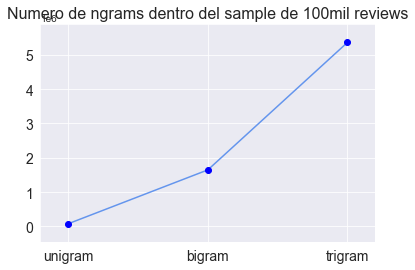

In [23]:
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Numero de ngrams dentro del sample de 100mil reviews', {'fontsize':16})
plt.show()